# Machine Learning for data analysis

## Topic : Random Forest
Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide *importance scores* for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

### Run a Random Forest
You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable


### What to submit:
Following completion of the steps described above, create a blog entry where you submit syntax used to run a Random Forest (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. Please note that your reviewers should NOT be required to download any files in order to complete the review.

### Data Set : Behavioral Risk Factor Surveillance System 

#### Context
The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.

#### Content
The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

Target Variable: "Label" (0=> Poor health condition, 1=> Good health Condition)


In [22]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

### 1. Load Data 

In [23]:
healthdata = pd.read_csv('Behavioral_risk_2015')

In [24]:
healthdata.dtypes
#only select columns with certain type 
healthdata = healthdata.select_dtypes('float64')

In [25]:
#create a function to check the data type of columns
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [26]:
print_categories(healthdata)

_STATE :  Numerical
FMONTH :  Numerical
DISPCODE :  Numerical
SEQNO :  Numerical
_PSU :  Numerical
CTELENUM :  Numerical
PVTRESD1 :  Numerical
COLGHOUS :  Numerical
STATERES :  Numerical
CELLFON3 :  Numerical
LADULT :  Numerical
NUMADULT :  Numerical
NUMMEN :  Numerical
NUMWOMEN :  Numerical
CTELNUM1 :  Numerical
CELLFON2 :  Numerical
CADULT :  Numerical
PVTRESD2 :  Numerical
CCLGHOUS :  Numerical
CSTATE :  Numerical
LANDLINE :  Numerical
HHADULT :  Numerical
GENHLTH :  Numerical
PHYSHLTH :  Numerical
MENTHLTH :  Numerical
POORHLTH :  Numerical
HLTHPLN1 :  Numerical
PERSDOC2 :  Numerical
MEDCOST :  Numerical
CHECKUP1 :  Numerical
BPHIGH4 :  Numerical
BPMEDS :  Numerical
BLOODCHO :  Numerical
CHOLCHK :  Numerical
TOLDHI2 :  Numerical
CVDINFR4 :  Numerical
CVDCRHD4 :  Numerical
CVDSTRK3 :  Numerical
ASTHMA3 :  Numerical
ASTHNOW :  Numerical
CHCSCNCR :  Numerical
CHCOCNCR :  Numerical
CHCCOPD1 :  Numerical
HAVARTH3 :  Numerical
ADDEPEV2 :  Numerical
CHCKIDNY :  Numerical
DIABETE3 :  Numer

In [27]:
#remove unnecessary columns 
healthdata = healthdata[['_RFHLTH','DIFFWALK','QLACTLM2','EMPLOY1','JOINPAIN','DIFFALON','DECIDE','ARTHSOCL','_MICHD','INCOME2','_INCOMG','_BMI5','_EDUCAG','USEEQUIP','_LLCPWT'
                          ,'DIABETE3','_STSTR','WTKG3','_WT2RAKE','_STRWT','FC60_','LMTJOIN3','MAXVO2_','_PSU','SEQNO','WEIGHT2','_VEGESUM','_LMTACT1','_STATE','CHCCOPD1','_AGE80'
                          ,'DIABAGE2','HEIGHT3','_LMTSCL1','_FRUTSUM','_DUALCOR','GRENDAY_','HTM4','HTIN4','ADDEPEV2','FVGREEN']]

In [28]:
#transform our target variable "_RFHLTH" to a binary categorical variable (0=> Poor health condition ; 1=> Good health Condition)
healthdata = healthdata.rename(columns = {'_RFHLTH':'label'})

In [29]:
healthdata['label'] = healthdata['label'].replace({2: 0})
healthdata = healthdata.loc[healthdata['label'].isin([0, 1])].copy()

In [30]:
#since decision tree cannot take null value, we do simple data cleaning by replace null with median value 
healthdata = healthdata.fillna(healthdata.median())

In [31]:
healthdata.shape

(440209, 41)

In [32]:
healthdata.describe()

,label,DIFFWALK,QLACTLM2,EMPLOY1,JOINPAIN,DIFFALON,DECIDE,ARTHSOCL,_MICHD,INCOME2,...,DIABAGE2,HEIGHT3,_LMTSCL1,_FRUTSUM,_DUALCOR,GRENDAY_,HTM4,HTIN4,ADDEPEV2,FVGREEN
count,440209.000000,440209.000000,440209.000000,440209.000000,4.402090e+05,440209.000000,440209.000000,440209.000000,440209.000000,440209.000000,...,440209.000000,440209.000000,440209.000000,4.402090e+05,440209.000000,4.402090e+05,440209.000000,440209.000000,440209.000000,440209.000000
mean,0.813414,1.860500,1.799538,3.938304,5.360136e+00,1.949367,1.942014,2.827593,1.912687,20.109846,...,54.072329,737.348162,3.654523,1.326659e+02,0.638671,5.549489e+01,169.413526,66.698189,1.837061,255.749276
std,0.389580,0.568469,0.668309,2.870855,6.237700e+00,0.480574,0.555403,0.582853,0.282294,31.715275,...,6.586627,1366.593363,1.260770,1.314551e+02,0.161180,6.320553e+01,10.382206,4.050837,0.559863,134.965559
min,0.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,200.000000,1.000000,5.397605e-79,0.079438,5.397605e-79,91.000000,36.000000,1.000000,101.000000
25%,1.000000,2.000000,2.000000,1.000000,5.000000e+00,2.000000,2.000000,3.000000,2.000000,5.000000,...,54.000000,504.000000,3.000000,6.000000e+01,0.626178,1.700000e+01,163.000000,64.000000,2.000000,202.000000
50%,1.000000,2.000000,2.000000,3.000000,5.000000e+00,2.000000,2.000000,3.000000,2.000000,7.000000,...,54.000000,507.000000,4.000000,1.000000e+02,0.669767,4.300000e+01,168.000000,66.000000,2.000000,205.000000
75%,1.000000,2.000000,2.000000,7.000000,5.000000e+00,2.000000,2.000000,3.000000,2.000000,8.000000,...,54.000000,510.000000,4.000000,2.000000e+02,0.720946,7.100000e+01,178.000000,70.000000,2.000000,310.000000
max,1.000000,9.000000,9.000000,9.000000,9.900000e+01,9.000000,9.000000,9.000000,2.000000,99.000000,...,99.000000,9999.000000,9.000000,1.500000e+04,0.920562,9.900000e+03,241.000000,95.000000,9.000000,999.000000


### 2. Split Data into train; test

In [33]:
#Declare predictors(explanatory variables) and response(target variable)

predictors = healthdata.drop(columns = ['label'])
targets = healthdata.label

In [34]:
#split up your data using 'train_test_split' function and set the size ratio (60%:40%)

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)
pred_train.shape

(264125, 40)

In [35]:
pred_test.shape

(176084, 40)

In [36]:
tar_train.shape

(264125,)

In [37]:
tar_test.shape

(176084,)

### 3. Modeling and Prediction

In [38]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

n_estimators=15

classifier=RandomForestClassifier(n_estimators)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 4. Evaluating random forest model 

In [40]:
#confusion matrix table 
def confusionTable(predictedY,realY):
    '''
    predictedY: predicted Y with binary value: 0 or 1
    realY: real Y with binary valye :0 or 1
    '''
    confusion_train=pd.crosstab(predictedY, realY)
    PPV=confusion_train.iloc[1,1]/(confusion_train.iloc[1,1]+confusion_train.iloc[1,0])
    NPV=confusion_train.iloc[0,0]/(confusion_train.iloc[0,0]+confusion_train.iloc[0,1])
    accuracy=(confusion_train.iloc[1,1]+confusion_train.iloc[0,0])/(confusion_train.iloc[0,0]+confusion_train.iloc[0,1]+confusion_train.iloc[1,1]+confusion_train.iloc[1,0])
    confusion_train['PV']=[NPV,PPV]
    specificity=confusion_train.iloc[0,0]/(confusion_train.iloc[1,0]+confusion_train.iloc[0,0])
    sensitivity=confusion_train.iloc[1,1]/(confusion_train.iloc[1,1]+confusion_train.iloc[0,1])
    confusion_train.loc['SS']=[specificity, sensitivity,accuracy]
    return confusion_train

In [41]:
confusionTable(tar_test, predictions)

col_0,0.0,1.0,PV
label,,,
0.0,15380.000000,17423.000000,0.468860
1.0,8025.000000,135256.000000,0.943991
SS,0.657125,0.885885,0.855478


In [42]:
#Feature importance (FI)
#indicateS the sum of the reduction in Gini Impurity over all the nodes that are split on that feature.

importance = pd.DataFrame()

i = 0
for col in predictors.columns:
    importance[col] = [classifier.feature_importances_[i]]
    i += 1
importance = importance.transpose()
importance.columns = ['Feature Importance']
importance = importance.sort_values('Feature Importance', ascending = False)
importance.head()

,Feature Importance
DIFFWALK,0.069798
QLACTLM2,0.053077
EMPLOY1,0.043707
_LLCPWT,0.036341
_LMTSCL1,0.036030


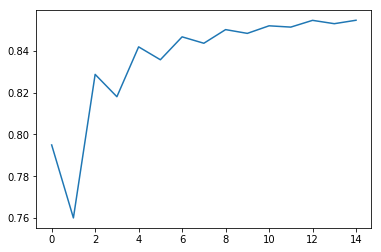

In [43]:
"""
Running a different number of trees and see the effect of that on the accuracy of the prediction
"""

trees=range(n_estimators)
accuracy=np.zeros(n_estimators)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)

### Conclusion:


Random forest by intuition, is a forest of decision trees. It simply just randomly assign some variables to each tree while at each candidate splits, it select features from a random subset of the features. After training, it is classified by majority votes while predictions for our target variable can be made by taking the majority vote in the case of classification trees.

In the example above, a random forest analysis was performed to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable (which the individual health condition, varible 'label' in our case). While this assignment focus more on the interpretation for the usage of random forest, I took a rather simplistic approach for data cleaning.In this dataset, we have included 40 explanatory variables including tobacco use, health care coverage, HIV/AIDS knowledge or prevention, physical activity, and fruit and vegetable consumption. 

From the result, it is apparent that explanatory variables with the highest relative importance scores were variable 'DIFFWALK'
,'QLACTLM2'	,'EMPLOY1',	'_LLCPWT'and '_LMTSCL1'. The accuracy of the random forest is around 0.855478; specificity score of 0.657125 and sensitivity score of 0.885885. 

Based of the plotted graph of "accuracy" in terms of number of trees(num_estimators), it is obvious to us that growing the 2 trees is the most ideal case as subsequent growing of multiple trees casue little affect to the overall accuracy of the model.